# Neural Network for Regression
We will apply regression on financial data from [Yahoo Finance! - Dow Jones Industrial Average (^DJI) data](https://in.finance.yahoo.com/quote/%5EDJI/history?period1=1282933800&period2=1535394600&interval=1d&filter=history&frequency=1d) to predict Close value of stock.

## [Dow Jones Industrial Average](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)

The Dow Jones Industrial Average (DJIA), is a stock market index that shows how 30 large, publicly owned companies based in the United States have traded during a standard trading session in the stock market. The value of the Dow is not a weighted arithmetic mean and does not represent its component companies' market capitalization, but rather the sum of the price of one share of stock for each component company. The sum is corrected by a factor which changes whenever one of the component stocks has a stock split or stock dividend, so as to generate a consistent value for the index.

It is the second-oldest U.S. market index after the Dow Jones Transportation Average, created by Wall Street Journal editor and Dow Jones & Company co-founder Charles Dow. Currently owned by S&P Dow Jones Indices, which is majority owned by S&P Global, it is the best known of the Dow Averages, of which the first (non-industrial) was originally published on February 16, 1885.



<a id='import_packages'></a>
# Import Packages

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<a id='load_data'></a>
# Load Data

In [4]:
data = pd.read_csv("data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


<a id='data_preparation'></a>
# Data Preparation
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statistically and then split the target varibles and normalize, followed by splitting the dataframe into numerical and categorical features.

# Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [5]:
# Shape
data.shape

(2014, 7)

# Statistical Summary
we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [92]:
# descriptions
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,16756.880170,16835.962791,16676.660195,16762.755255,16762.755255,1.699523e+08
std,3985.884743,3992.888506,3977.350484,3984.242430,3984.242430,1.072222e+08
min,9982.179688,10073.379883,9936.620117,10009.730469,10009.730469,8.410000e+06
25%,13104.239746,13175.674805,13045.425049,13107.277588,13107.277588,9.486500e+07
50%,16566.544922,16652.890625,16500.360352,16571.265625,16571.265625,1.284750e+08
75%,18282.699219,18350.062988,18205.062500,18287.908203,18287.908203,2.177400e+08
max,26584.279297,26616.710938,26435.339844,26616.710938,26616.710938,8.239400e+08


# Spliting Target Variable

In [6]:
predictor = data.iloc[:,[1,2,3,5,6,]]
target = data.iloc[:,4]

# Standarize Features

In [9]:
# Standarize features
scaler = StandardScaler()
predictor = scaler.fit_transform(predictor)

# Train, Test Data Split

In [10]:
#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1409, 5)
x_test  (605, 5)
y_train  (1409,)
y_test  (605,)


C:\Users\computer\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Neural Network

In [11]:
# Import Neural Network library
from sklearn.neural_network import MLPRegressor

In [16]:
# Build model with neural network
nn_model = MLPRegressor().fit(x_train, y_train)

C:\Users\computer\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
# Predict using built model
predictvalues = nn_model.predict(x_test)
nn_model.score(x_train, y_train)

-15.790361878103839

In [18]:
# Check RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test, predictvalues)))

16147.0613997041


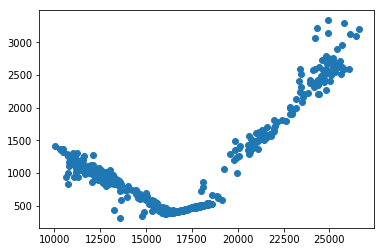

In [19]:
# Checking scatter of data between Y_test and predicted values
plt.scatter(y_test,predictvalues)

# Build Model with Neural Network
### With Hidden layers, Activation function, Solver and Learning Rate 

In [21]:
nn_model = MLPRegressor(hidden_layer_sizes=(10,15,10), activation='relu', solver='lbfgs', alpha=0.001,learning_rate='adaptive',random_state=0).fit(x_train, y_train)

In [22]:
# Predict using built model
predictvalues = nn_model.predict(x_test)
nn_model.score(x_train, y_train)

0.99999892532793222

In [23]:
# Check RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test, predictvalues)))

4.117424571605423


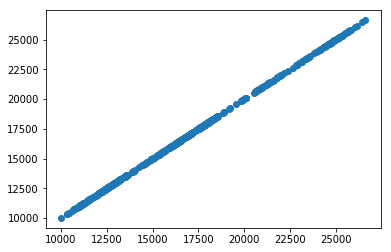

In [24]:
# Checking scatter of data between Y_test and predicted values
plt.scatter(y_test,predictvalues)